In [ ]:
import cv2 as cv
import numpy as np

# Load a grayscale image
image = cv.imread('/home/ajeet/codework/dataset_frames/2602597/0_38.jpg')

height, width = image.shape[:2]

# Calculate the width of the cut (1/8 of the width)
cut_width = width // 8

# Cut the left and right sections
left_section = image[:, 0:cut_width]  # Left 1/8
right_section = image[:, width - cut_width:width]  # Right 1/8

# Create reflections using cv.copyMakeBorder with cv.BORDER_REFLECT
left_reflected = cv.copyMakeBorder(left_section, 0, 0, 0, cut_width, cv.BORDER_REFLECT)
right_reflected = cv.copyMakeBorder(right_section, 0, 0, cut_width, 0, cv.BORDER_REFLECT)

# Create a new image to hold the result
# This will contain the reflected parts and the original image in the center
result_image = np.hstack((left_reflected, image, right_reflected))

# Display the original and result images
cv.imshow('Original Image', left_reflected)
cv.imshow('Reflected Image with Border Reflection', right_reflected)
cv.waitKey(5000)
cv.destroyAllWindows()

In [28]:
import cv2 as cv
import numpy as np

# Load a grayscale image
image = cv.imread('/tmp/video_incidents_ajeet/2628150/0_1.jpg')
print(image.shape)

height, width = image.shape[:2]
cut_width = width // 8
print(cut_width)

# Cut the left and right sections
left_section = image[:, 0:cut_width]  # Left cut section
right_section = image[:, width - cut_width:width]  # Right cut section

# Save the cut sections as separate image
cv.imwrite('/home/ajeet/codework/ujjawal_github/bm_testing/normal_left_section.jpg', left_section)
cv.imwrite('/home/ajeet/codework/ujjawal_github/bm_testing/normal_right_section.jpg', right_section)

# Optionally display the original and cut sections
cv.imshow('Left Section', left_section)
cv.imshow('Right Section', right_section)
cv.waitKey(10000)
cv.destroyAllWindows()

(180, 320, 3)
40


In [30]:
import cv2 as cv
import numpy as np

# Load a grayscale image
image = cv.imread('/tmp/video_incidents_ajeet/2628150/0_11.jpg')
print(image.shape)

height, width = image.shape[:2]
cut_width = width // 8
print(cut_width)
# Determine padding sizes (you can adjust these values)
top_padding = 0  # pixels to add to the top
bottom_padding = 0  # pixels to add to the bottom
left_padding = cut_width  # pixels to add to the left
right_padding = cut_width  # pixels to add to the right

# Pad the image using BORDER_REPLICATE to extend edges
# padded_image = cv.copyMakeBorder(image, 
#                                   top_padding, bottom_padding, 
#                                   left_padding, right_padding, 
#                                   cv.BORDER_REPLICATE )

# Alternatively, use BORDER_REFLECT_101 for a mirrored effect
padded_image = cv.copyMakeBorder(image, 
                                  top_padding, bottom_padding, 
                                  left_padding, right_padding, 
                                  cv.BORDER_REFLECT_101)

# print(padded_image.shape)
# # Display the padded image
# cv.imshow(' Image', image)
# cv.imshow('Padded Image', padded_image)
# cv.waitKey(5000)
# cv.destroyAllWindows()

padded_height, padded_width = padded_image.shape[:2]

left_cut_width= cut_width*2
right_cut_width= cut_width*2
# Cut the left and right sections
left_section = padded_image[:, 0:left_cut_width]  # Left cut section
right_section = padded_image[:, padded_width - right_cut_width:padded_width]  # Right cut section

# Save the cut sections as separate images
cv.imwrite('/home/ajeet/codework/ujjawal_github/bm_testing/padded_image.jpg', padded_image)
cv.imwrite('/home/ajeet/codework/ujjawal_github/bm_testing/left_section.jpg', left_section)
cv.imwrite('/home/ajeet/codework/ujjawal_github/bm_testing/right_section.jpg', right_section)

# Optionally display the original and cut sections
cv.imshow('Original Image', padded_image)
cv.imshow('Left Section', left_section)
cv.imshow('Right Section', right_section)
cv.waitKey(10000)
cv.destroyAllWindows()

(180, 320, 3)
40


In [1]:
from modeling_yolov8 import YOLOv8PersonDetector
import os
import cv2
from ultralytics import YOLO
import torch
import time

yolov8_persondetector = YOLOv8PersonDetector()

model_yolo = YOLO("yolov8n.pt").to("cpu")
classes_to_detect = [0]  # Class 0 for "person" in COCO dataset

In [2]:
frames = ["/tmp/video_incidents_ajeet/2628150/0_11.jpg"]

results = model_yolo.predict(frames, conf=0.10, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)

results[0].boxes


0: 192x320 2 persons, 43.4ms
Speed: 0.6ms preprocess, 43.4ms inference, 1.5ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.8888, 0.1313])
data: tensor([[5.3639e+01, 2.2571e+01, 2.7957e+02, 1.7992e+02, 8.8877e-01, 0.0000e+00],
        [2.7800e+02, 1.4715e+02, 3.1602e+02, 1.8000e+02, 1.3129e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (180, 320)
shape: torch.Size([2, 6])
xywh: tensor([[166.6037, 101.2476, 225.9299, 157.3527],
        [297.0085, 163.5757,  38.0244,  32.8486]])
xywhn: tensor([[0.5206, 0.5625, 0.7060, 0.8742],
        [0.9282, 0.9088, 0.1188, 0.1825]])
xyxy: tensor([[ 53.6387,  22.5712, 279.5686, 179.9239],
        [277.9963, 147.1514, 316.0207, 180.0000]])
xyxyn: tensor([[0.1676, 0.1254, 0.8737, 0.9996],
        [0.8687, 0.8175, 0.9876, 1.0000]])

In [32]:
frames = ["/home/ajeet/codework/ujjawal_github/bm_testing/padded_image.jpg"]

results = model_yolo.predict(frames, conf=0.50, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)

results[0].boxes


0: 160x320 1 person, 55.9ms
Speed: 12.0ms preprocess, 55.9ms inference, 0.9ms postprocess per image at shape (1, 3, 160, 320)
Results saved to runs/detect/predict
8 labels saved to runs/detect/predict/labels


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8902])
data: tensor([[ 92.8617,  23.9412, 314.2224, 180.0000,   0.8902,   0.0000]])
id: None
is_track: False
orig_shape: (180, 400)
shape: torch.Size([1, 6])
xywh: tensor([[203.5421, 101.9706, 221.3607, 156.0588]])
xywhn: tensor([[0.5089, 0.5665, 0.5534, 0.8670]])
xyxy: tensor([[ 92.8617,  23.9412, 314.2224, 180.0000]])
xyxyn: tensor([[0.2322, 0.1330, 0.7856, 1.0000]])

In [34]:
# frames = ["/home/ajeet/codework/ujjawal_github/bm_testing/left_section.jpg"]

# results = model_yolo.predict(frames, conf=0.50, device="cpu", imgsz=320, classes=classes_to_detect, 
#                         save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)

# print(results[0].boxes)

results = model_yolo.predict(["/home/ajeet/codework/ujjawal_github/bm_testing/right_section.jpg"], conf=0.10, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)

print(results[0].boxes)


0: 320x160 3 persons, 82.5ms
Speed: 2.2ms preprocess, 82.5ms inference, 2.6ms postprocess per image at shape (1, 3, 320, 160)
Results saved to runs/detect/predict
8 labels saved to runs/detect/predict/labels
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.])
conf: tensor([0.1993, 0.1219, 0.1016])
data: tensor([[5.1837e+01, 1.4682e+02, 8.0000e+01, 1.7985e+02, 1.9931e-01, 0.0000e+00],
        [0.0000e+00, 1.4673e+02, 2.6783e+01, 1.7955e+02, 1.2192e-01, 0.0000e+00],
        [0.0000e+00, 1.4661e+02, 8.0000e+01, 1.7989e+02, 1.0161e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (180, 80)
shape: torch.Size([3, 6])
xywh: tensor([[ 65.9187, 163.3352,  28.1627,  33.0257],
        [ 13.3917, 163.1396,  26.7833,  32.8260],
        [ 40.0000, 163.2493,  80.0000,  33.2837]])
xywhn: tensor([[0.8240, 0.9074, 0.3520, 0.1835],
        [0.1674, 0.9063, 0.3348, 0.1824],
        [0.5000, 0.9069, 1.0000, 0.1849]])
xyxy: tensor([[ 51.8373, 146.8224,  80.0000, 179.84

In [29]:
results = model_yolo.predict(["/home/ajeet/codework/ujjawal_github/bm_testing/normal_right_section.jpg"], conf=0.50, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)

print(results[0].boxes)


0: 320x96 (no detections), 57.2ms
Speed: 7.2ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 96)
Results saved to runs/detect/predict
7 labels saved to runs/detect/predict/labels
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (180, 40)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


In [36]:
import cv2

cap = cv2.VideoCapture('/home/ajeet/codework/yolo_testing/test5/2571769/2571769')
backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fgMask = backSub.apply(frame)
    
    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y, w, h) = cv2.boundingRect(contour)
            aspect_ratio = w / h

            # Check if aspect ratio is typical for a human
            if 0.4 < aspect_ratio < 0.6:  # Example range for human aspect ratio
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                print("Detected potential person based on aspect ratio.")

    # Display the results
    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgMask)

    if cv2.waitKey(30) == 27:  # Press 'Esc' to exit
        break

cap.release()
cv2.destroyAllWindows()

Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential person based on aspect ratio.
Detected potential p

KeyboardInterrupt: 

: 

In [2]:
import cv2
import numpy as np

# Initialize video capture
cap = cv2.VideoCapture('/tmp/video_incidents_ajeet/output.mp4')

# Create a background subtractor object
backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Define left section (1/8 of the frame)
    left_frame = frame[:, :frame.shape[1] // 8]  # Left section (1/8 of the frame)

    # Apply background subtraction to the left section only
    fgMask = backSub.apply(left_frame)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Variable to keep track of motion detection
    motion_detected = False

    # Iterate through contours to check for significant motion
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:  # Adjust this threshold based on your needs
            (x, y, w, h) = cv2.boundingRect(contour)
            aspect_ratio = w / h  # Calculate aspect ratio

            # Check if aspect ratio is typical for a human (for example, between 0.4 and 0.6)
            if 0.4 < aspect_ratio < 0.6:
                print("Left motiom detected")
                cv2.rectangle(left_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw on the left section
                motion_detected = True

    # Optionally display a rectangle on the original frame if motion is detected
    if motion_detected:
        cv2.rectangle(frame, (0, 0), (frame.shape[1] // 8, frame.shape[0]), (0, 255, 0), 2)  # Left section

    # Display the results
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Left Foreground Mask', fgMask)

    # Exit on 'Esc' key
    if cv2.waitKey(30) == 27:
        break

cap.release()
cv2.destroyAllWindows()


Left motiom detected


In [1]:
import cv2
import numpy as np

# Initialize video capture
cap = cv2.VideoCapture('/tmp/video_incidents_ajeet/output.mp4')

# Create a background subtractor object
backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break


    right_frame = frame[:, 7 * frame.shape[1] // 8:]  # Right section (1/8 of the frame)
    # Apply background subtraction to the right section only
    fgMask = backSub.apply(right_frame)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Variable to keep track of motion detection
    motion_detected = False

    # Iterate through contours to check for significant motion
    for contour in contours:
        area = cv2.contourArea(contour)
        print("Area:", area)
        (x, y, w, h) = cv2.boundingRect(contour)
        aspect_ratio = w / h  # Calculate aspect ratio
        print(f"aspect_ratio: {aspect_ratio}")
        if area > 500:  # Adjust this threshold based on your needs
            (x, y, w, h) = cv2.boundingRect(contour)
            aspect_ratio = w / h  # Calculate aspect ratio

            # Check if aspect ratio is typical for a human (for example, between 0.4 and 0.6)
            if 0.4 < aspect_ratio < 0.6:
                print("Left motiom detected")
                cv2.rectangle(right_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw on the left section
                motion_detected = True

    # Optionally display a rectangle on the original frame if motion is detected
    if motion_detected:
        cv2.rectangle(frame, (0, 0), (frame.shape[1] // 8, frame.shape[0]), (0, 255, 0), 2)  # Left section

    # Display the results
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Left Foreground Mask', fgMask)

    # Exit on 'Esc' key
    if cv2.waitKey(30) == 27:
        break

cap.release()
cv2.destroyAllWindows()


Area: 6981.0
aspect_ratio: 0.2222222222222222
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 2.0
Area: 64.0
aspect_ratio: 0.55
Area: 4.0
aspect_ratio: 0.6
Area: 0.0
aspect_ratio: 2.0
Area: 33.0
aspect_ratio: 0.625
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 0.3333333333333333
Area: 4.5
aspect_ratio: 0.6
Area: 0.0
aspect_ratio: 0.5
Area: 0.0
aspect_ratio: 1.5
Area: 6.5
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 2.0
Area: 12.0
aspect_ratio: 0.45454545454545453
Area: 1.0
aspect_ratio: 1.5
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 0.5
Area: 0.0
aspect_ratio: 1.0
Area: 2.5
aspect_ratio: 1.0
Area: 2.0
aspect_ratio: 0.5
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 1.0
Area: 0.5
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 1.0
Area: 0.0
aspect_ratio: 1.0
Area: 4.5
aspect_ratio: 0.6
Area: 0.0
aspect_ratio: 1.0
Area: 4.0
aspect_ratio: 0.5454545454545454
Area: 0.0
aspect_ratio: 1.0
Area: 

In [1]:
import cv2
import numpy as np
from collections import deque

# Constants
FPS = 30  # Frames per second of the video

# Initialize video capture
cap = cv2.VideoCapture('/tmp/video_incidents_ajeet/output.mp4')
backSub = cv2.createBackgroundSubtractorMOG2()

# Initialize lists for storing positions and velocities
positions = []
velocities = deque(maxlen=2)  # Store last two positions for speed calculation

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fgMask = backSub.apply(frame)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y, w, h) = cv2.boundingRect(contour)
            center = (x + w // 2, y + h // 2)
            positions.append(center)

            # Calculate speed and direction
            if len(positions) > 1:
                # Calculate distance moved
                dx = positions[-1][0] - positions[-2][0]
                dy = positions[-1][1] - positions[-2][1]
                distance = np.sqrt(dx ** 2 + dy ** 2)

                # Speed (pixels per second)
                speed = distance * FPS  # Since position is in pixels and FPS is the frame rate

                # Direction (angle in radians)
                direction = np.arctan2(dy, dx)  # Angle in radians

                # Calculate acceleration if we have at least two speed values
                if len(velocities) == 2:
                    acceleration = speed - velocities[-1]  # Change in speed over time
                else:
                    acceleration = 0  # No acceleration can be computed yet

                # Store the current speed
                velocities.append(speed)

                # Debug output
                print(f"Speed: {speed:.2f} pixels/s, Direction: {direction:.2f} radians, Acceleration: {acceleration:.2f} pixels/s^2")

            # Draw bounding box
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the results
    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgMask)

    if cv2.waitKey(30) == 27:  # Press 'Esc' to exit
        break

cap.release()
cv2.destroyAllWindows()

Speed: 2670.67 pixels/s, Direction: 0.90 radians, Acceleration: 0.00 pixels/s^2
Speed: 1426.18 pixels/s, Direction: -1.83 radians, Acceleration: 0.00 pixels/s^2
Speed: 750.60 pixels/s, Direction: 1.61 radians, Acceleration: -675.58 pixels/s^2
Speed: 800.50 pixels/s, Direction: -1.34 radians, Acceleration: 49.90 pixels/s^2
Speed: 782.30 pixels/s, Direction: 1.49 radians, Acceleration: -18.20 pixels/s^2
Speed: 67.08 pixels/s, Direction: 2.03 radians, Acceleration: -715.22 pixels/s^2
Speed: 2671.35 pixels/s, Direction: -2.57 radians, Acceleration: 2604.27 pixels/s^2
Speed: 2307.66 pixels/s, Direction: 0.28 radians, Acceleration: -363.69 pixels/s^2
Speed: 1806.24 pixels/s, Direction: -2.94 radians, Acceleration: -501.42 pixels/s^2
Speed: 1583.19 pixels/s, Direction: 0.17 radians, Acceleration: -223.05 pixels/s^2
Speed: 1727.02 pixels/s, Direction: -2.84 radians, Acceleration: 143.83 pixels/s^2
Speed: 2155.20 pixels/s, Direction: 0.68 radians, Acceleration: 428.18 pixels/s^2
Speed: 2330.94 

In [1]:
import cv2
import numpy as np

# Video capture
cap = cv2.VideoCapture('/tmp/video_incidents_ajeet/output.mp4')
backSub = cv2.createBackgroundSubtractorMOG2()

# Variables for tracking motion
prev_centers = []
speeds = []
directions = []
accelerations = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = frame[:, 7 * frame.shape[1] // 8:]  # Right section (1/8 of the frame)

    fgMask = backSub.apply(frame)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    person_detected = False

    # Get frame dimensions
    height, width = frame.shape[:2]

    for contour in contours:
        area = cv2.contourArea(contour)
        # print(area)
        # Filter out small contours (noise)
        if area < 10:  # Adjust this threshold based on your application
            continue

        # Get bounding box and center point
        (x, y, w, h) = cv2.boundingRect(contour)
        center = (x + w // 2, y + h // 2)
        aspect_ratio = w / h

        # Check for human-like aspect ratio and area
        if True and (10 < area < 5000):  # Example range for human detection
            person_detected = True
            
            # Draw bounding box
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Calculate speed and direction
            if len(prev_centers) > 0:
                # Calculate the distance moved
                dx = center[0] - prev_centers[-1][0]
                dy = center[1] - prev_centers[-1][1]
                distance = np.sqrt(dx ** 2 + dy ** 2)

                # Calculate speed (pixels/frame)
                speed = distance  # Assuming frame rate is constant, speed can be pixels/frame
                speeds.append(speed)

                # Calculate direction (in radians)
                direction = np.arctan2(dy, dx)
                directions.append(direction)

                # Calculate acceleration
                if len(speeds) > 1:
                    acceleration = speeds[-1] - speeds[-2]  # Change in speed
                    accelerations.append(acceleration)

                # Print speed, direction, and acceleration
                print(f"Speed: {speed:.2f} pixels/frame, Direction: {direction:.2f} radians", end='')
                if len(accelerations) > 0:
                    print(f", Acceleration: {accelerations[-1]:.2f} pixels/frame²")
                else:
                    print(", Acceleration: N/A")

            # Update the previous center point
            prev_centers.append(center)

    # Flagging violation based on speed and direction analysis
    if person_detected:
        # Set thresholds for speed and direction
        if speeds and speeds[-1] > 5:  # Example threshold for speed
            print("Violation: Second person detected in the background.")
        
    # Display the results
    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgMask)

    if cv2.waitKey(30) == 27:  # Press 'Esc' to exit
        break

cap.release()
cv2.destroyAllWindows()

Speed: 2.00 pixels/frame, Direction: -1.57 radians, Acceleration: N/A
Speed: 3.61 pixels/frame, Direction: -2.55 radians, Acceleration: 1.61 pixels/frame²
Speed: 8.06 pixels/frame, Direction: -0.12 radians, Acceleration: 4.46 pixels/frame²
Speed: 7.00 pixels/frame, Direction: 3.14 radians, Acceleration: -1.06 pixels/frame²
Violation: Second person detected in the background.
Speed: 10.30 pixels/frame, Direction: 0.51 radians, Acceleration: 3.30 pixels/frame²
Speed: 8.25 pixels/frame, Direction: -2.90 radians, Acceleration: -2.05 pixels/frame²
Violation: Second person detected in the background.
Speed: 8.25 pixels/frame, Direction: 0.24 radians, Acceleration: 0.00 pixels/frame²
Speed: 8.00 pixels/frame, Direction: 3.14 radians, Acceleration: -0.25 pixels/frame²
Violation: Second person detected in the background.
Speed: 9.00 pixels/frame, Direction: 0.00 radians, Acceleration: 1.00 pixels/frame²
Speed: 8.00 pixels/frame, Direction: 3.14 radians, Acceleration: -1.00 pixels/frame²
Violati

In [3]:
import cv2
import numpy as np

# Initialize video capture and background subtractor
cap = cv2.VideoCapture('/tmp/video_incidents_ajeet/output.mp4')
backSub = cv2.createBackgroundSubtractorMOG2()

# Variables to track the previous center points and speeds
prev_centers = []
speeds = []
directions = []
accelerations = []
count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = frame[:, 7 * frame.shape[1] // 8:]  # Right section (1/8 of the frame)
    # Apply background subtraction
    fgMask = backSub.apply(frame)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour = None
    largest_area = 0

    # Loop through the contours to find the largest one
    for contour in contours:
        area = cv2.contourArea(contour)
        
        # Filter out small contours (noise)
        if area < 10:  # Adjust this threshold based on your application
            continue
        
        # Check if this contour is the largest found so far
        if area > largest_area:
            largest_area = area
            largest_contour = contour

    # If a largest contour is found, process it
    if largest_contour is not None:
        (x, y, w, h) = cv2.boundingRect(largest_contour)
        center = (x + w // 2, y + h // 2)

        # Draw bounding box around the largest contour
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Calculate speed and direction
        if len(prev_centers) > 0:
            # Calculate the distance moved
            dx = center[0] - prev_centers[-1][0]
            dy = center[1] - prev_centers[-1][1]
            distance = np.sqrt(dx ** 2 + dy ** 2)

            # Calculate speed (pixels/frame)
            speed = distance  # Assuming frame rate is constant, speed can be pixels/frame
            speeds.append(speed)

            # Calculate direction (in radians)
            # direction = np.arctan2(dy, dx)
            # directions.append(direction)

            # Calculate acceleration
            if len(speeds) > 1:
                acceleration = speeds[-1] - speeds[-2]  # Change in speed
                accelerations.append(acceleration)

            # Print speed, direction, and acceleration
            # print(f"Speed: {speed:.2f} pixels/frame, Direction: {direction:.2f} radians", end='')
            # if len(accelerations) > 0:
            #     print(f", Acceleration: {accelerations[-1]:.2f} pixels/frame²")
            # else:
            #     print(", Acceleration: N/A")

        # Update the previous center point
        prev_centers.append(center)

        # Flagging violation based on speed and direction analysis
        if speeds and speeds[-1] > 5:  # Example threshold for speed
            count = count + 1
            print(f"{count}: Violation: Second person detected in the background.")

    # Display the results
    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgMask)

    if cv2.waitKey(30) == 27:  # Press 'Esc' to exit
        break

cap.release()
cv2.destroyAllWindows()


1: Violation: Second person detected in the background.
2: Violation: Second person detected in the background.
3: Violation: Second person detected in the background.
4: Violation: Second person detected in the background.
5: Violation: Second person detected in the background.
6: Violation: Second person detected in the background.
7: Violation: Second person detected in the background.
8: Violation: Second person detected in the background.
9: Violation: Second person detected in the background.
10: Violation: Second person detected in the background.
11: Violation: Second person detected in the background.
12: Violation: Second person detected in the background.
13: Violation: Second person detected in the background.
14: Violation: Second person detected in the background.
15: Violation: Second person detected in the background.
16: Violation: Second person detected in the background.
17: Violation: Second person detected in the background.
18: Violation: Second person detected in

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture('/tmp/video_incidents_ajeet/output.mp4')
backSub = cv2.createBackgroundSubtractorMOG2()

prev_centers = []
speeds = []
directions = []
accelerations = []
count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = frame[:, 7 * frame.shape[1] // 8:]
    fgMask = backSub.apply(frame)
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    largest_contour = None
    largest_area = 0

    for contour in contours:
        area = cv2.contourArea(contour)

        if area < 10: 
            continue
        
        if area > largest_area:
            largest_area = area
            largest_contour = contour

    if largest_contour is not None:
        # (x, y, w, h) = cv2.boundingRect(largest_contour)
        # center = (x + w // 2, y + h // 2)

        # cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        rect = cv2.minAreaRect(largest_contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        cv2.drawContours(frame, [box], 0, (0, 255, 0), 2)

        center = (int(rect[0][0]), int(rect[0][1]))

        if len(prev_centers) > 0:
            dx = center[0] - prev_centers[-1][0]
            dy = center[1] - prev_centers[-1][1]
            distance = np.sqrt(dx ** 2 + dy ** 2)

            speed = distance 
            speeds.append(speed)

            # Calculate direction (in radians)
            # direction = np.arctan2(dy, dx)
            # directions.append(direction)

            # Calculate acceleration
            if len(speeds) > 1:
                acceleration = speeds[-1] - speeds[-2]  # Change in speed
                accelerations.append(acceleration)

            # print(f"Speed: {speed:.2f} pixels/frame, Direction: {direction:.2f} radians", end='')
            # if len(accelerations) > 0:
            #     print(f", Acceleration: {accelerations[-1]:.2f} pixels/frame²")
            # else:
            #     print(", Acceleration: N/A")

        prev_centers.append(center)

        if speeds and speeds[-1] > 5:
            count = count + 1
            print(f"{count}: Violation: Second person detected in the background.")

    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgMask)

    if cv2.waitKey(30) == 27:
        break

cap.release()
cv2.destroyAllWindows()


/tmp/ipykernel_528097/4092695792.py:43: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


1: Violation: Second person detected in the background.
2: Violation: Second person detected in the background.
3: Violation: Second person detected in the background.
4: Violation: Second person detected in the background.
5: Violation: Second person detected in the background.
6: Violation: Second person detected in the background.
7: Violation: Second person detected in the background.
8: Violation: Second person detected in the background.
9: Violation: Second person detected in the background.
10: Violation: Second person detected in the background.
11: Violation: Second person detected in the background.
12: Violation: Second person detected in the background.
13: Violation: Second person detected in the background.
14: Violation: Second person detected in the background.
15: Violation: Second person detected in the background.
16: Violation: Second person detected in the background.
17: Violation: Second person detected in the background.
18: Violation: Second person detected in

In [2]:
import cv2
import numpy as np
from ultralytics import YOLO  # Import the YOLO class

print("hi")

class PersonDetectorYOLO:
    def __init__(self, model_path="yolov8n.pt", device="cpu"):
        self.device = "cpu"
        self.model = YOLO(model_path).to(self.device)
        self.classes_to_detect = [0]  # Class 0 for "person" in COCO dataset

    def predict(self, frame, conf_threshold=0.5):
        # Perform inference
        results = self.model.predict(source=frame, conf=conf_threshold, device=self.device, classes=self.classes_to_detect)
        return results[0]

# Instantiate the person detector
detector = PersonDetectorYOLO(model_path="yolov8n.pt")

cap = cv2.VideoCapture('/home/ajeet/codework/yolo_testing/test3/2538482/2538482')

tracker = None
tracked_person_bbox = None

backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if tracker is None:
        # Use the YOLO model to detect people
        detections = detector.predict(frame)
        print("detection",detections)

        if detections.boxes:
            # Extract the first person detected
            detection = detections.boxes[0]
            x, y, w, h = detection.xywh[0].int().tolist()
            
            tracked_person_bbox = (x - w // 2, y - h // 2, w, h)

            # Initialize the tracker
            tracker = cv2.TrackerKCF_create()
            # tracker.create()
            print("tracker", tracker)
            tracker.init(frame, tracked_person_bbox)

    else:
        success, tracked_person_bbox = tracker.update(frame)

        if success:
            (x, y, w, h) = [int(v) for v in tracked_person_bbox]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Create a mask for motion detection outside the tracked bounding box
            mask = np.zeros(frame.shape[:2], dtype=np.uint8)
            mask[y:y + h, x:x + w] = 255
            inverse_mask = cv2.bitwise_not(mask)

            fg_mask = backSub.apply(frame)
            monitored_area = cv2.bitwise_and(fg_mask, fg_mask, mask=inverse_mask)

            contours, _ = cv2.findContours(monitored_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in contours:
                if cv2.contourArea(contour) > 2000:
                    print("Motion detected outside tracked area!")
                    cv2.drawContours(frame, [contour], -1, (0, 0, 255), 2)

            # largest_contour = None
            # largest_area = 0

            # for contour in contours:
            #     area = cv2.contourArea(contour)

            #     if area < 10: 
            #         continue
                
            #     if area > largest_area:
            #         largest_area = area
            #         largest_contour = contour

            # if largest_contour is not None:
            #     # (x, y, w, h) = cv2.boundingRect(largest_contour)
            #     # center = (x + w // 2, y + h // 2)

            #     # cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            #     rect = cv2.minAreaRect(largest_contour)
            #     box = cv2.boxPoints(rect)
            #     box = np.int0(box)

            #     cv2.drawContours(frame, [box], 0, (0, 255, 0), 2)

            #     center = (int(rect[0][0]), int(rect[0][1]))

            #     if len(prev_centers) > 0:
            #         dx = center[0] - prev_centers[-1][0]
            #         dy = center[1] - prev_centers[-1][1]
            #         distance = np.sqrt(dx ** 2 + dy ** 2)

            #         speed = distance 
            #         speeds.append(speed)

            #         # Calculate direction (in radians)
            #         # direction = np.arctan2(dy, dx)
            #         # directions.append(direction)

            #         # Calculate acceleration
            #         if len(speeds) > 1:
            #             acceleration = speeds[-1] - speeds[-2]  # Change in speed
            #             accelerations.append(acceleration)

            #         # print(f"Speed: {speed:.2f} pixels/frame, Direction: {direction:.2f} radians", end='')
            #         # if len(accelerations) > 0:
            #         #     print(f", Acceleration: {accelerations[-1]:.2f} pixels/frame²")
            #         # else:
            #         #     print(", Acceleration: N/A")

            #     prev_centers.append(center)

            #     if speeds and speeds[-1] > 5:
            #         count = count + 1
            #         print(f"{count}: Violation: Second person detected in the background.")

    cv2.imshow('Frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


hi

0: 384x640 2 persons, 199.4ms
Speed: 2.4ms preprocess, 199.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
detection ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 

In [4]:
import cv2
import numpy as np

# Load two images
image1 = cv2.imread('/home/ajeet/testing/data/person1.jpg')  # Replace with your image path
image2 = cv2.imread('/home/ajeet/testing/data/apple.jpg')  # Replace with your image path

# Ensure both images are of the same size
# image1 = cv2.resize(image1, (500, 500))
# image2 = cv2.resize(image2, (500, 500))

# Apply bitwise AND
result = cv2.bitwise_not(image1)
cv2.imshow('Bitwise AND Result', result)

# # Example 3: cv2.multiply
# multiplied_image = cv2.multiply(image1, image2 / 255.0)  # Normalize image2 to avoid overflow
# cv2.imshow('Multiplied Image', multiplied_image)

# # Example 4: cv2.divide
# divided_image = cv2.divide(image1, image2 + 1)  # Add 1 to avoid division by zero
# cv2.imshow('Divided Image', divided_image)

# # Example 5: cv2.addWeighted
# weighted_image = cv2.addWeighted(image1, 0.6, image2, 0.4, 0)  # Blend images with weights
# cv2.imshow('Weighted Image', weighted_image)

# Wait for a key press and close the image windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import cv2

image1 = cv2.imread('/tmp/video_incidents_ajeet/2628150/0_1.jpg')  # Replace with your image path
image2 = cv2.imread('/tmp/video_incidents_ajeet/2628150/0_1199.jpg') 

diff = cv2.absdiff(image1, image2)

    # Display the result
cv2.imshow("Absolute Difference", diff)

# Wait for a key press and close the windows
cv2.waitKey(5000)
cv2.destroyAllWindows()


In [2]:
import cv2

# Read the image
image = cv2.imread('/tmp/video_incidents_ajeet/2628150/0_15.jpg')

# Set brightness and contrast factors
alpha = 1  # Simple contrast control [1.0-3.0]
beta =  50   # Simple brightness control [0-100]

# Adjust the brightness
bright_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Display the original and brightened images
cv2.imshow('Original Image', image)
cv2.imshow('Brightened Image', bright_image)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [4]:
import cv2 as cv
import numpy as np

# Load an image
img_original = cv.imread('/tmp/video_incidents_ajeet/2628150/0_15.jpg')

# Gamma value (you can change it as needed)
gamma = 0.4

# Create a lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply the gamma correction using the lookup table
res = cv.LUT(img_original, lookUpTable)

# Display the original and corrected images
cv.imshow('Original Image', img_original)
cv.imshow('Gamma Corrected Image', res)

cv.waitKey(10000)
cv.destroyAllWindows()


In [9]:
import cv2 as cv
import numpy as np

# Load an image
img_original = cv.imread('/tmp/video_incidents_ajeet/2538482/0_15.jpg')

# Parameters for brightness and contrast adjustment
alpha = 1.2  # Contrast control (1.0 - 3.0)
beta = 50    # Brightness control (0 - 100)

# Apply alpha and beta adjustments
img_contrast_bright = cv.convertScaleAbs(img_original, alpha=alpha, beta=beta)

# Parameters for gamma correction
gamma = 0.5  # Change this value to adjust gamma (e.g., <1 lightens, >1 darkens)

# Create a lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction
img_final = cv.LUT(img_contrast_bright, lookUpTable)

# Display the images
# cv.imshow('Original Image', img_original)
cv.imshow('Adjusted Image', img_contrast_bright)
cv.imshow('Gamma Corrected Image', img_final)
cv.waitKey(10000)
cv.destroyAllWindows()


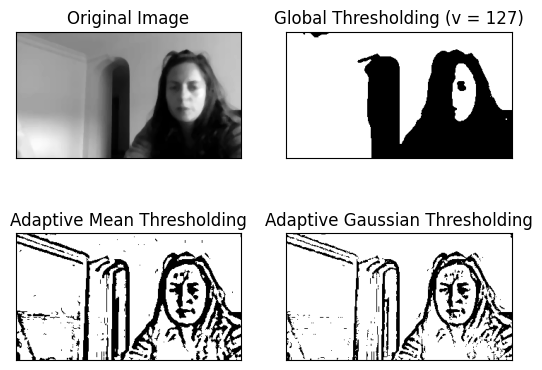

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('/tmp/video_incidents_ajeet/2538482/0_15.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [1]:
import cv2
import numpy as np
from ultralytics import YOLO  # Import the YOLO class

print("hi")

class PersonDetectorYOLO:
    def __init__(self, model_path="yolov8n.pt", device="cpu"):
        self.device = "cpu"
        self.model = YOLO(model_path).to(self.device)
        self.classes_to_detect = [0]  # Class 0 for "person" in COCO dataset

    def predict(self, frame, conf_threshold=0.5):
        # Perform inference
        results = self.model.predict(source=frame, conf=conf_threshold, device=self.device, classes=self.classes_to_detect)
        return results[0]

# Instantiate the person detector
detector = PersonDetectorYOLO(model_path="yolov8n.pt")

cap = cv2.VideoCapture('/home/ajeet/codework/yolo_testing/test3/2538482/2538482')

tracker = None
tracked_person_bbox = None

backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if tracker is None:
        # Use the YOLO model to detect people
        detections = detector.predict(frame)
        print("detection",detections)

        if detections.boxes:
            # Extract the first person detected
            detection = detections.boxes[0]
            x, y, w, h = detection.xywh[0].int().tolist()
            
            tracked_person_bbox = (x - w // 2, y - h // 2, w, h)

            # Initialize the tracker
            tracker = cv2.TrackerKCF_create()
            # tracker.create()
            print("tracker", tracker)
            tracker.init(frame, tracked_person_bbox)

    else:
        success, tracked_person_bbox = tracker.update(frame)

        if success:
            (x, y, w, h) = [int(v) for v in tracked_person_bbox]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Create a mask for motion detection outside the tracked bounding box
            mask = np.zeros(frame.shape[:2], dtype=np.uint8)
            mask[y:y + h, x:x + w] = 255
            inverse_mask = cv2.bitwise_not(mask)

            fg_mask = backSub.apply(frame)
            monitored_area = cv2.bitwise_and(fg_mask, fg_mask, mask=inverse_mask)

            contours, _ = cv2.findContours(monitored_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in contours:
                if cv2.contourArea(contour) > 2000:
                    print("Motion detected outside tracked area!")
                    cv2.drawContours(frame, [contour], -1, (0, 0, 255), 2)

    cv2.imshow('Frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


hi

0: 384x640 2 persons, 82.5ms
Speed: 4.0ms preprocess, 82.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
detection ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49

In [13]:
cv2.Tracker

Name: opencv-python
Version: 4.10.0.82
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages
Requires: numpy
Required-by: ultralytics


In [3]:
print("hello")

hello


In [3]:
import cv2

# Read the image
image = cv2.imread("/tmp/video_incidents_ajeet/2538482/0_15.jpg")

# Set brightness and contrast factors
alpha = 1.0  # Simple contrast control [1.0-3.0]
beta = 50    # Simple brightness control [0-100]

# Adjust the brightness
bright_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Display the original and brightened images
cv2.imshow('Original Image', image)
cv2.imshow('Brightened Image', bright_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
cv2.__version__

'4.5.1'

In [17]:
from modeling_yolov8 import YOLOv8PersonDetector
import os
import cv2
from ultralytics import YOLO
import torch
import time
import matplotlib.pyplot as plt

yolov8_persondetector = YOLOv8PersonDetector()

model_yolo = YOLO("yolov8n.pt").to("cpu")
classes_to_detect = [0]  # Class 0 for "person" in COCO dataset

In [84]:
results = model_yolo.predict(["/tmp/video_incidents_ajeet/2628150/0_1.jpg"], conf=0.10, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)


0: 192x320 2 persons, 23.3ms
Speed: 9.7ms preprocess, 23.3ms inference, 0.5ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict4
2 labels saved to runs/detect/predict4/labels



0: 192x320 1 person, 71.2ms
Speed: 19.6ms preprocess, 71.2ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels


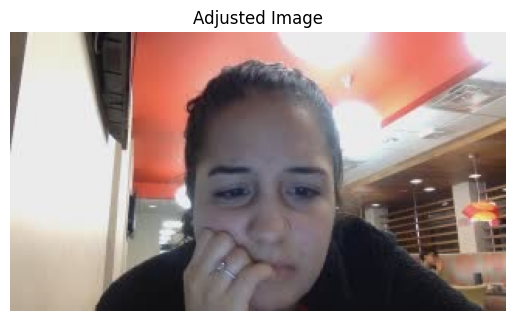

In [74]:


adjusted_image_path = "/tmp/video_incidents_ajeet_temp/bright.jpg"
img_original = cv2.imread("/tmp/video_incidents_ajeet/2593937/1_550.jpg")

alpha = 1
beta = 0
img_contrast_bright = cv2.convertScaleAbs(img_original, alpha=alpha, beta=beta)
cv2.imwrite(adjusted_image_path, img_contrast_bright)

# yolo_classifications, results = yolov8_persondetector.dummy_classify_batch([adjusted_image_path], conf_threshold=0.10)
results = model_yolo.predict([adjusted_image_path], conf=0.10, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)

# print(results.boxes)
# Display the adjusted image using matplotlib
plt.imshow(cv2.cvtColor(img_contrast_bright, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')  # Turn off axis labels
plt.title("Adjusted Image")  # Title for the image
plt.show()  # Display the image

In [134]:
results = model_yolo.predict(["/tmp/video_incidents_ajeet/2573666/0_867.jpg"], conf=0.05, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)


0: 192x320 1 person, 28.5ms
Speed: 1.5ms preprocess, 28.5ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict4
11 labels saved to runs/detect/predict4/labels


In [133]:
original_image_path = "/tmp/video_incidents_ajeet/2573666/0_867.jpg"
img_original = cv2.imread(original_image_path)

# First YOLO detection
results = model_yolo.predict([original_image_path], conf=0.6, device="cpu", imgsz=320, classes=classes_to_detect)

# Check if any person was detected
if results[0].boxes is not None and len(results[0].boxes) > 0:
    for box in results[0].boxes:
        # Get bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integer coordinates
        
        # Draw a white rectangle over the detected person
        cv2.rectangle(img_original, (x1, y1), (x2, y2), (255, 255, 255), thickness=cv2.FILLED)

# Save the modified image with the white rectangle
modified_image_path = "/tmp/video_incidents_ajeet_temp/modified_image.jpg"
cv2.imwrite(modified_image_path, img_original)

# Pass the modified image to YOLO for second detection
second_results = model_yolo.predict([modified_image_path], conf=0.05, device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)



0: 192x320 1 person, 65.6ms
Speed: 0.3ms preprocess, 65.6ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict4
11 labels saved to runs/detect/predict4/labels

0: 192x320 (no detections), 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 2.1ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict4
11 labels saved to runs/detect/predict4/labels


In [6]:
import cv2
import numpy as np
from ultralytics import YOLO  # Import the YOLO class

print("hi")
prev_centers = []
speeds = []
count = 0


# cap = cv2.VideoCapture('/home/ajeet/codework/yolo_testing/test5/2565397/2565397')
cap = cv2.VideoCapture('/home/ajeet/codework/yolo_testing/test6/2628150/2628150')
backSub = cv2.createBackgroundSubtractorMOG2()

cap.set(cv2.CAP_PROP_FPS, 1)
fps = cap.get(cv2.CAP_PROP_FPS)

frame_interval = int(fps)
frame_interval

hi


9

In [2]:
cap.set(cv2.CAP_PROP_FPS, 1)

False

In [4]:
cap.get(cv2.CAP_PROP_FPS)

9.904741285992639

In [3]:
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640) 

False

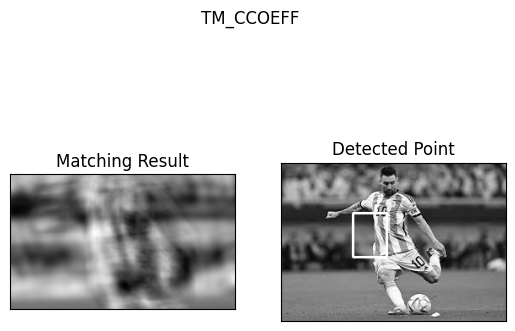

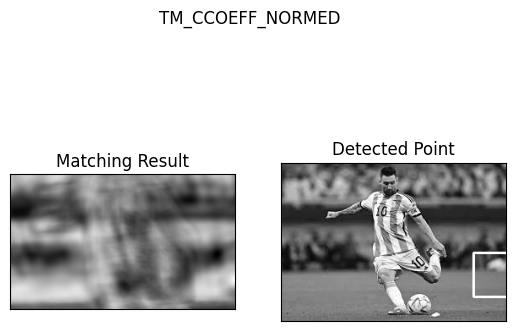

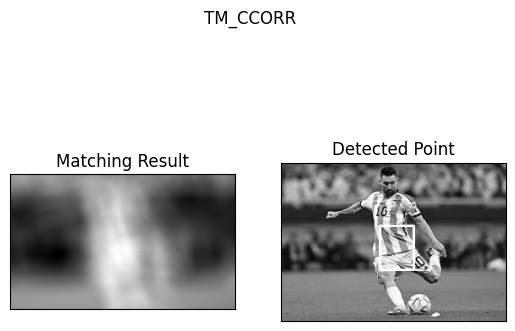

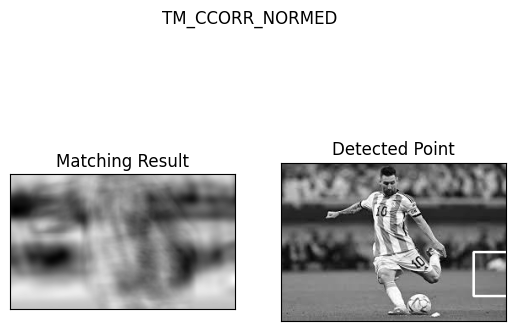

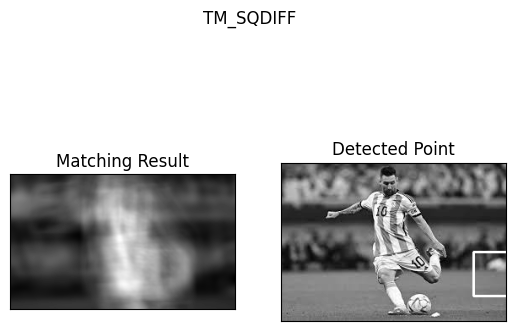

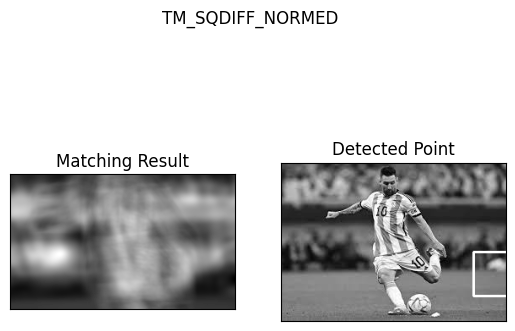

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('/home/ajeet/Downloads/messi.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('/home/ajeet/Downloads/template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
 
for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)
 
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
 
    cv.rectangle(img,top_left, bottom_right, 255, 2)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
 
    plt.show()

In [2]:
import cv2
import numpy as np

# Read the main image and template image
main_image = cv2.imread('/home/ajeet/Downloads/messi.jpeg')
template = cv2.imread('/home/ajeet/Downloads/template.jpg')

# Convert both images to grayscale
main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Get the width and height of the template
w, h = template_gray.shape[::-1]

# Apply template matching
result = cv2.matchTemplate(main_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Find the min and max values and their locations in the result
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(min_val)
print(max_val)
# Use max location if using methods like cv2.TM_CCOEFF, TM_CCORR, or TM_CCOEFF_NORMED
# Use min location if using methods like cv2.TM_SQDIFF or TM_SQDIFF_NORMED

# Draw a rectangle around the matched region
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(main_image, top_left, bottom_right, (0, 255, 0), 2)

# Show the result
cv2.imshow('Detected', main_image)
cv2.waitKey(10000)
cv2.destroyAllWindows()

-0.5427582263946533
0.6275158524513245


In [3]:
import cv2
import numpy as np

# Load the images
image = cv2.imread('/home/ajeet/Downloads/messi2.jpeg')
template = cv2.imread('/home/ajeet/Downloads/template.jpg')
h, w = template.shape[:2]

# Iterate through scales
for scale in np.linspace(0.5, 1.5, 10):
    resized_template = cv2.resize(template, (int(w * scale), int(h * scale)))
    result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED)

    # Get the locations of the best matches
    threshold = 0.8  # Adjust this threshold as needed
    loc = np.where(result >= threshold)

    for pt in zip(*loc[::-1]):  # Switch columns and rows
        cv2.rectangle(image, pt, (pt[0] + resized_template.shape[1], pt[1] + resized_template.shape[0]), (0, 255, 0), 2)

# Show the result
cv2.imshow("Detected", image)
cv2.waitKey(10000)
cv2.destroyAllWindows()


In [11]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

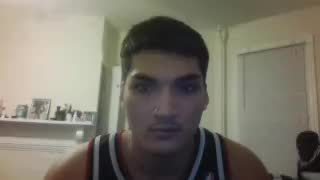

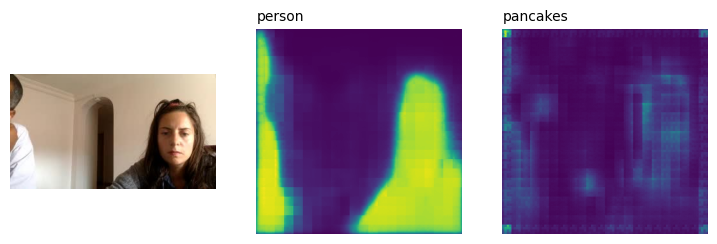

In [118]:
from PIL import Image
import requests

# url = "https://unsplash.com/photos/8Nc_oQsc2qQ/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjcxMjAwNzI0&force=true&w=640"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("/tmp/video_incidents_ajeet/2538482/0_50.jpg")
image

prompts = ["person", "pancakes"]

import torch

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")
# predict
with torch.no_grad():
  outputs = model(**inputs)
preds = outputs.logits.unsqueeze(1)


import matplotlib.pyplot as plt

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];

In [146]:
tensor = torch.sigmoid(preds[0][0])

# Count the number of pixels greater than 0
count_nonzero = torch.sum(tensor > 0.09).item()
count_nonzero

61940

In [130]:
torch.min(preds[0][0].flatten())

tensor(-6.9368)

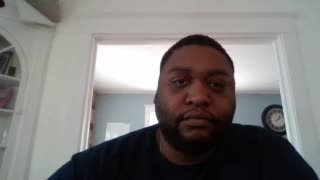

In [155]:
url = "https://unsplash.com/photos/Ki7sAc8gOGE/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTJ8fGNvZmZlJTIwdG8lMjBnb3xlbnwwfHx8fDE2NzExOTgzNDQ&force=true&w=640"
# prompt = Image.open("/home/ajeet/codework/yolo_testing/test7/2538482/onboarding/scans_11.jpg")
prompt = Image.open("/home/ajeet/codework/yolo_testing/test6/2571769/facescan/scans_1.jpg")
prompt

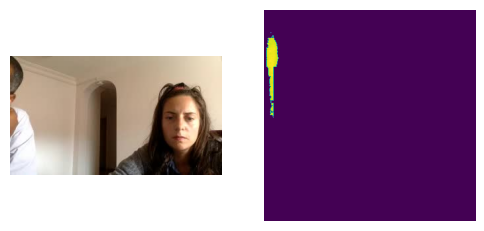

In [156]:
encoded_image = processor(images=[image], return_tensors="pt")
encoded_prompt = processor(images=[prompt], return_tensors="pt")
# predict
with torch.no_grad():
  outputs = model(**encoded_image, conditional_pixel_values=encoded_prompt.pixel_values)
preds = outputs.logits.unsqueeze(1)
preds = torch.transpose(preds, 0, 1)

_, ax = plt.subplots(1, 2, figsize=(6, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
preds_sigmoid = torch.sigmoid(preds[0][0])

# Set values less than 0 to 0
preds_sigmoid[preds_sigmoid < 0.60] = 0
ax[1].imshow(preds_sigmoid)

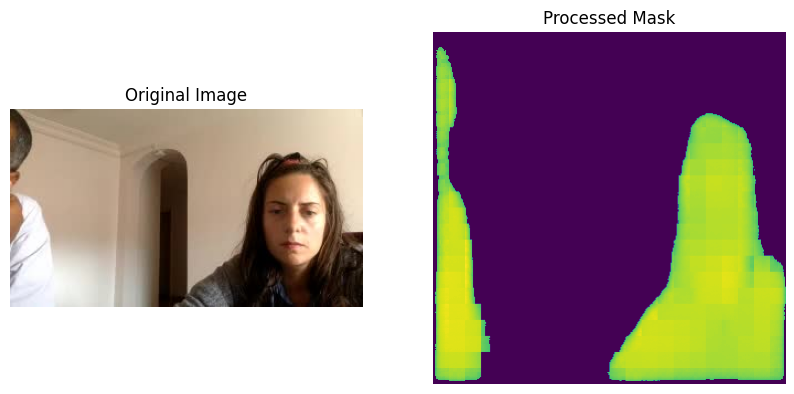

In [149]:
preds = outputs.logits.unsqueeze(1)
preds = torch.transpose(preds, 0, 1)

# Apply sigmoid to preds
preds_sigmoid = torch.sigmoid(preds[0][0])

# Set values less than 0 to 0
preds_sigmoid[preds_sigmoid < 0.60] = 0

# Plot the original image and the processed mask
_, ax = plt.subplots(1, 2, figsize=(10, 5))
[a.axis('off') for a in ax.flatten()]

# Display the original image
ax[0].imshow(image)
ax[0].set_title("Original Image")

# Display the processed mask
ax[1].imshow(preds_sigmoid.numpy())
ax[1].set_title("Processed Mask")

plt.show()

In [106]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = '/tmp/video_incidents_ajeet/2538482/0_50.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Resize the image to match the size of the preds output if needed
image_resized = cv2.resize(image, (352, 352))

In [107]:
preds_sigmoid.shape

(352, 352)

In [108]:
image_resized.shape

(352, 352)

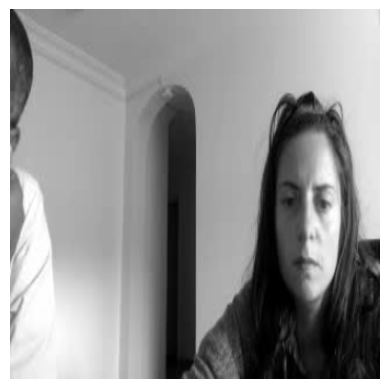

In [109]:
preds_sigmoid = torch.sigmoid(preds[0][0])  # Assuming preds[0][0] is your prediction tensor
preds_sigmoid = preds_sigmoid.numpy()  # Convert to NumPy array
preds_sigmoid = np.where(preds_sigmoid > 0, 255, 0).astype(np.uint8)  # Convert to binary mask

# Perform bitwise_and operation
result = cv2.bitwise_and(image_resized, image_resized, mask=preds_sigmoid)

# Display the result
plt.imshow(result, cmap="gray")
plt.axis('off')
plt.show()

In [110]:
tensor = preds[0][0]

# Count the number of pixels greater than 0
count_nonzero = torch.sum(tensor > 0).item()
count_nonzero

29993

In [78]:
max(tensor[tensor > 0])

tensor(1.9289)

In [83]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = '/home/ajeet/codework/yolo_testing/test7/2538482/onboarding/scans_11.jpg'  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Resize the image to match the size of the preds output if needed
image_resized = cv2.resize(image, (353, 352))

# Convert the image to a binary format
# threshold = 127  # Threshold value for binarization
# _, binary_image = cv2.threshold(image_resized, threshold, 1, cv2.THRESH_BINARY)

# Convert the binary image to a torch tensor
image_tensor = torch.from_numpy(image_resized).int()

# Assuming preds is your model's output
preds = torch.randn((1, 1, 352, 353))  # Example prediction tensor
pred_mask = torch.sigmoid(preds[0][0])
binary_pred_mask = (pred_mask > 0.5).int()

# Perform the bitwise AND operation
result = binary_pred_mask & image_tensor

# Convert the result to numpy for visualization
result_np = result.numpy()

# Display the original image, binary mask, and the result
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(binary_pred_mask.numpy(), cmap='gray')
plt.title("Binary Mask from Model")

plt.subplot(1, 3, 3)
plt.imshow(result_np, cmap='gray')
plt.title("Bitwise AND Result")

plt.show()


RuntimeError: The size of tensor a (353) must match the size of tensor b (352) at non-singleton dimension 1

In [2]:
import torch
from torchvision import transforms
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor

# Load the model and processor
model_name = "google/vit-base-patch16-224-in21k"
model = ViTForImageClassification.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)

# Load and preprocess the image
image_path = '/home/ajeet/codework/yolo_testing/test7/2538482/onboarding/scans_11.jpg'  # Replace with the path to your image
image = Image.open(image_path)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted class
predictions = outputs.logits.argmax(dim=1)
predicted_class = predictions.item()

# Print the predicted class
print(f'Predicted class index: {predicted_class}')


/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-10 18:06:39.343996: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 18:06:39.393202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-10 18:06:40.541732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['cla

Predicted class index: 1


In [160]:
outputs

ImageClassifierOutput(loss=None, logits=tensor([[-0.0141,  0.2162]]), hidden_states=None, attentions=None)

In [2]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True, help="path to images directory")
# args = vars(ap.parse_args())

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
images = ["/home/ajeet/codework/yolo_testing/test7/2538482/onboarding/scans_11.jpg"]

# loop over the image paths
for imagePath in images:
    # load the image and resize it to (1) reduce detection time
    # and (2) improve detection accuracy
    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=min(400, image.shape[1]))
    orig = image.copy()
    
    # detect people in the image
    (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
        padding=(8, 8), scale=1.05)
    
    print(rects)

    # draw the original bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

    # show some information on the number of bounding boxes
    filename = imagePath[imagePath.rfind("/") + 1:]
    print("[INFO] {}: {} original boxes, {} after suppression".format(
        filename, len(rects), len(pick)))

    # show the output images
    cv2.imshow("Before NMS", orig)
    cv2.imshow("After NMS", image)
    cv2.waitKey(10000)

# cleanup the windows
cv2.destroyAllWindows()


()
[INFO] scans_11.jpg: 0 original boxes, 0 after suppression


In [ ]:
!